In [1]:
import pandas as pd

In [11]:
customer_master = pd.read_csv('../data100/customer_master.csv')

In [12]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [4]:
item_master = pd.read_csv('../data100/item_master.csv')
transaction_1 = pd.read_csv('../data100/transaction_1.csv')
transaction_2 = pd.read_csv('../data100/transaction_2.csv')
transaction_detail_1 = pd.read_csv('../data100/transaction_detail_1.csv')
transaction_detail_2 = pd.read_csv('../data100/transaction_detail_2.csv')

In [5]:
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [6]:
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [7]:
transaction_2.head()

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [8]:
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [9]:
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [10]:
customer_master.shape

(4192, 8)

In [13]:
transaction = pd.concat([transaction_1,transaction_2],ignore_index=True)

In [14]:
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [15]:
transaction.shape

(6786, 4)

In [16]:
transaction_2.shape

(1786, 4)

In [17]:
transaction_1.shape

(5000, 4)

In [18]:
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2],ignore_index=True)

In [19]:
transaction_detail.shape

(7144, 4)

In [20]:
join_data = 
    pd.merge(transaction_detail,transaction[
                 ['transaction_id','payment_date','customer_id']
             ],
               on='transaction_id',how='left')

In [22]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [23]:
join_data = pd.merge(join_data,customer_master, on='customer_id', how='left')

In [25]:
join_data.shape

(7144, 13)

In [27]:
join_data = pd.merge(join_data,item_master, on='item_id', how='left')

In [28]:
join_data.shape

(7144, 15)

In [29]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


In [30]:
join_data['price'] = join_data['quantity'] * join_data.item_price

In [32]:
join_data[['quantity','item_price','price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


In [33]:
print(join_data['price'].sum())

971135000


In [34]:
print(transaction['price'].sum())

971135000


In [35]:
join_data.price.sum()

np.int64(971135000)

In [36]:
print(transaction.price.sum())

971135000


In [37]:
join_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7144 entries, 0 to 7143
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   detail_id          7144 non-null   int64 
 1   transaction_id     7144 non-null   object
 2   item_id            7144 non-null   object
 3   quantity           7144 non-null   int64 
 4   payment_date       7144 non-null   object
 5   customer_id        7144 non-null   object
 6   customer_name      7144 non-null   object
 7   registration_date  7144 non-null   object
 8   email              7144 non-null   object
 9   gender             7144 non-null   object
 10  age                7144 non-null   int64 
 11  birth              7144 non-null   object
 12  pref               7144 non-null   object
 13  item_name          7144 non-null   object
 14  item_price         7144 non-null   int64 
 15  price              7144 non-null   int64 
dtypes: int64(5), object(11)
memory usage: 893.

In [38]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [39]:
join_data.isna().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [40]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price,price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000,170000


In [41]:
print(join_data.payment_date.min())

2019-02-01 01:36:57


In [42]:
print(join_data.payment_date.max())

2019-07-31 23:41:38


In [43]:
print(join_data.payment_date.dtype)

object


In [44]:
join_data.payment_date = pd.to_datetime(join_data.payment_date)

In [45]:
print(join_data.payment_date.dtype)

datetime64[ns]


In [48]:
join_data['payment_month'] = join_data.payment_date.dt.strftime('%Y%m')
#gisa_df.country.str.contains('Korea')

In [52]:
print(join_data.payment_month.dtype)

object


In [50]:
join_data[['payment_date','payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [49]:
join_data.columns

Index(['detail_id', 'transaction_id', 'item_id', 'quantity', 'payment_date',
       'customer_id', 'customer_name', 'registration_date', 'email', 'gender',
       'age', 'birth', 'pref', 'item_name', 'item_price', 'price',
       'payment_month'],
      dtype='object')

In [54]:
join_data.groupby('payment_month')['price'].sum()

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [56]:
join_data.groupby('payment_month').price.sum()

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [58]:
join_data.groupby('payment_month').price.sum()

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [59]:
join_data.groupby(['payment_month','item_name'])[['price','quantity']].sum()

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [60]:
pd.pivot_table(join_data, 
                   index='item_name', 
                   columns='payment_month',
                   values=['price','quantity'], 
                   aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

In [62]:
pd.pivot_table(join_data, 
                   index='payment_month', 
                   columns='item_name', 
                   values=['price','quantity'], 
                   aggfunc='sum')

price                                         quantity       \
item_name          PC-A      PC-B      PC-C      PC-D      PC-E     PC-A PC-B   
payment_month                                                                   
201902         24150000  25245000  19800000  31140000  59850000      483  297   
201903         26000000  25500000  19080000  25740000  64050000      520  300   
201904         25900000  23460000  21960000  24300000  64890000      518  276   
201905         24850000  25330000  20520000  25920000  58800000      497  298   
201906         26000000  23970000  21840000  28800000  63420000      520  282   
201907         25250000  28220000  19440000  26100000  71610000      505  332   

                              
item_name     PC-C PC-D PC-E  
payment_month                 
201902         165  173  285  
201903         159  143  305  
201904         183  135  309  
201905         171  144  280  
201906         182  160  302  
201907         162  145  341

In [64]:
graph_data = pd.pivot_table(join_data, 
                   index='payment_month', 
                   columns='item_name', 
                   values='price', 
                   aggfunc='sum')

<Axes: xlabel='payment_month'>

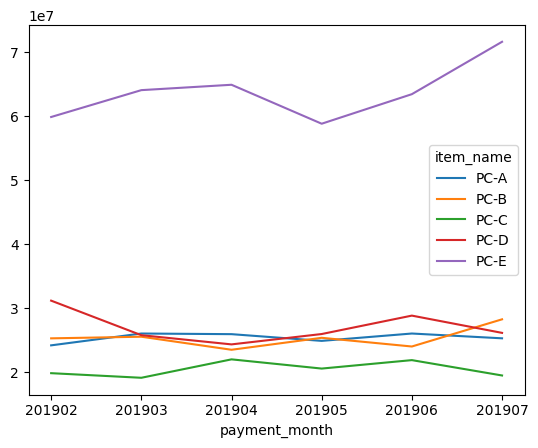

In [65]:
graph_data.plot()

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

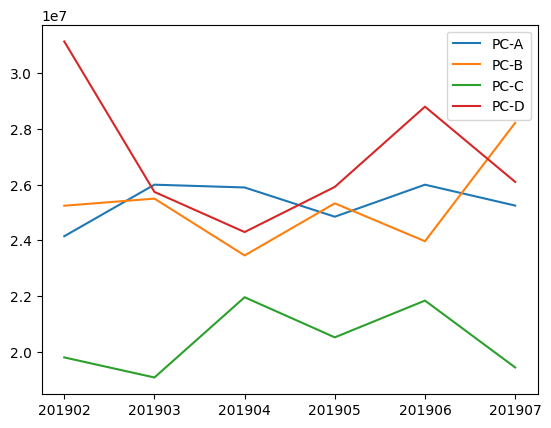

In [68]:
plt.plot(list(graph_data.index), graph_data['PC-A'], label='PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label='PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label='PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label='PC-D')
plt.legend()

In [70]:
uriage_data = pd.read_csv('../data100/uriage.csv')

In [71]:
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [76]:
kokyaku_data = pd.read_excel('../data100/kokyaku_daicho.xlsx')

In [75]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
     -------------------------------------  245.8/250.9 kB 7.4 MB/s eta 0:00:01
     -------------------------------------- 250.9/250.9 kB 5.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [77]:
kokyaku_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [80]:
uriage_data.item_price.isna().sum()

np.int64(387)

In [81]:
uriage_data.purchase_date = pd.to_datetime(uriage_data.purchase_date)

In [82]:
uriage_data['purchase_month'] = uriage_data['purchase_date'].dt.strftime('%Y%m')

In [83]:
uriage_data.columns

Index(['purchase_date', 'item_name', 'item_price', 'customer_name',
       'purchase_month'],
      dtype='object')

In [84]:
uriage_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상 품 S,NaN,김우찬,201907
2,2019-05-11 19:42:00,상 품 a,NaN,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품a,NaN,김강현,201904


In [85]:
res = uriage_data.pivot_table(index='purchase_month',
                              columns='item_name',
                              aggfunc='size', 
                              fill_value=0)

In [86]:
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [88]:
res = uriage_data.pivot_table(index='purchase_month',
                              columns='item_name',
                              values='item_price',
                              aggfunc='sum', 
                              fill_value=0)

In [89]:
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1100.0,1200.0,1500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201902,0.0,0.0,0.0,0.0,0.0,0.0,2400.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1900.0,2000.0,2200.0,0.0,0.0
201903,0.0,500.0,1300.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2300.0,0.0,1700.0,...,0.0,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0
201905,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0
201906,0.0,0.0,0.0,0.0,0.0,2300.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,2400.0,0.0
201907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1500.0,0.0,1800.0,0.0,0.0,0.0,0.0,0.0


In [96]:
len(pd.unique(uriage_data.item_name))

26

In [92]:
uriage_data.item_name = uriage_data.item_name.str.upper()

In [93]:
uriage_data.item_name

0         상품A
1       상 품 S
2       상 품 A
3         상품Z
4         상품A
        ...  
2994      상품Y
2995      상품M
2996      상품Q
2997      상품H
2998      상품D
Name: item_name, Length: 2999, dtype: object

In [94]:
uriage_data.item_name = uriage_data.item_name.str.replace(' ','')

In [95]:
uriage_data.item_name

0       상품A
1       상품S
2       상품A
3       상품Z
4       상품A
       ... 
2994    상품Y
2995    상품M
2996    상품Q
2997    상품H
2998    상품D
Name: item_name, Length: 2999, dtype: object

In [97]:
uriage_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상품S,NaN,김우찬,201907
2,2019-05-11 19:42:00,상품A,NaN,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품A,NaN,김강현,201904


In [98]:
uriage_data.sort_values(by=['item_name'],ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1748,2019-05-19 20:22:00,상품A,100.0,김시훈,201905
223,2019-06-25 08:13:00,상품A,100.0,김유진,201906
1742,2019-06-13 16:03:00,상품A,100.0,김건희,201906
1738,2019-02-10 00:28:00,상품A,100.0,김하랑,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,NaN,김동욱,201904
2881,2019-04-30 14:21:00,상품Y,NaN,김하준,201904
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준,201901
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현,201905


In [100]:
pd.unique(uriage_data.item_name)

array(['상품A', '상품S', '상품Z', '상품V', '상품O', '상품U', '상품L', '상품C', '상품I',
       '상품R', '상품X', '상품G', '상품P', '상품Q', '상품Y', '상품N', '상품W', '상품E',
       '상품K', '상품B', '상품F', '상품D', '상품M', '상품H', '상품T', '상품J'],
      dtype=object)

In [101]:
uriage_data.isna().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [102]:
flg_is_null = uriage_data.item_price.isna()

In [109]:
uriage_data.loc[flg_is_null, 'item_name']

1       상품S
2       상품A
4       상품A
6       상품A
14      상품A
       ... 
2987    상품K
2990    상품O
2992    상품C
2996    상품Q
2997    상품H
Name: item_name, Length: 387, dtype: object

In [108]:
uriage_data.loc[flg_is_null, 'item_name'].unique()

array(['상품S', '상품A', '상품P', '상품N', '상품W', '상품R', '상품I', '상품L', '상품F',
       '상품O', '상품B', '상품C', '상품V', '상품Q', '상품U', '상품K', '상품T', '상품X',
       '상품E', '상품M', '상품G', '상품J', '상품D', '상품H', '상품Y'], dtype=object)

In [111]:
for trg in list(uriage_data.loc[flg_is_null, 'item_name'].unique()):
    price = uriage_data.loc[(~flg_is_null)&(uriage_data.item_name==trg),'item_price'].max()
    uriage_data.loc[(flg_is_null)&(uriage_data.item_name==trg),'item_price']=price
    pass

uriage_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상품S,1900.0,김우찬,201907
2,2019-05-11 19:42:00,상품A,100.0,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품A,100.0,김강현,201904


In [106]:
uriage_data.isna().any(axis=0)

purchase_date     False
item_name         False
item_price        False
customer_name     False
purchase_month    False
dtype: bool